# Keras TF - Project #1

We'll use a copy from the [UCI ML Breast Cancer Wisconsin (Diagnostic) datasets](https://goo.gl/U2Uwz2), and try to classify, using feaures computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, if the cancer is benign and malignant.

## Data and setup

In [1]:
import pandas as pd
import numpy as np

### The Data
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

In [2]:
df = pd.read_csv('../data/cancer-classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

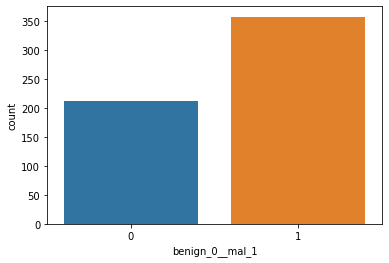

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

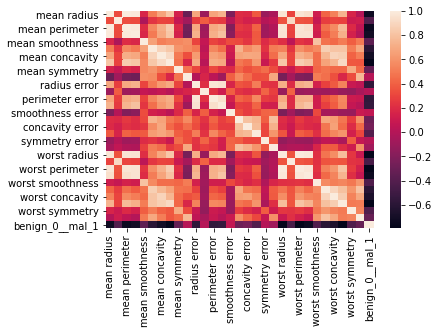

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

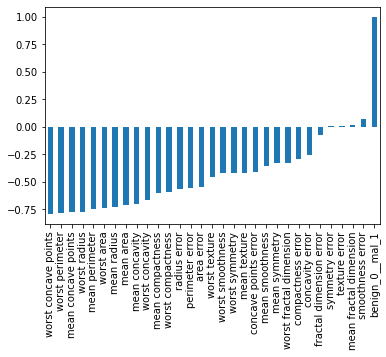

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

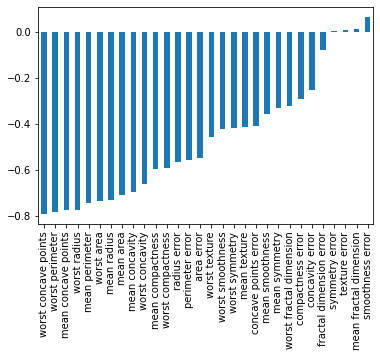

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Model
### Training and testing data

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

### Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model   

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [19]:
X_train.shape

(426, 30)

## Training the Model 

### Model 1: without early stopping

In [20]:
model = Sequential()

# Didn't found many standardized ways on how to define the number of layers
# This questions had some good answers though
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [21]:
# Didn't found many standardized ways on how to define the number of epochs
# Some good references:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 1s 20ms/step - loss: 0.7120 - val_loss: 0.6869
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6883 - val_loss: 0.6733
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6696 - val_loss: 0.6578
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6505 - val_loss: 0.6287
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6170 - val_loss: 0.5870
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5773 - val_loss: 0.5431
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5353 - val_loss: 0.4943
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4857 - val_loss: 0.4430
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4264 - val_loss: 0.3935
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3948 - val_loss: 0.3511
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0490 - val_loss: 0.1074
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0418 - val_loss: 0.1155
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0555 - val_loss: 0.1083
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0501 - val_loss: 0.1156
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0495 - val_loss: 0.1032
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.1165
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0570 - val_loss: 0.1093
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0692 - val_loss: 0.1056
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0510 - val_loss: 0.1179
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0567 - val_loss: 0.1094
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0273 - val_loss: 0.1526
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0316 - val_loss: 0.1571
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0285 - val_loss: 0.1602
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.1488
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.1568
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0258 - val_loss: 0.1605
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0247 - val_loss: 0.1564
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0300 - val_loss: 0.1527
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0299 - val_loss: 0.1611
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.1691
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.2055
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.2045
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.2182
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0125 - val_loss: 0.2111
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.2062
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0118 - val_loss: 0.2336
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.2067
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.2346
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.2074
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.2143
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.2762
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.2992
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.2880
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.2837
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.2884
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.3080
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.2687
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.3177
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.2795
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.3331
Epoc

In [22]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

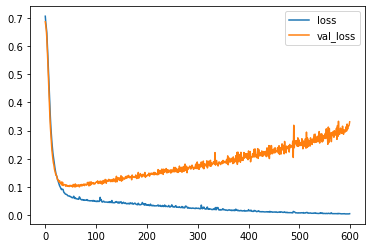

In [23]:
model_loss.plot()

### Model 2: with early stopping

In [24]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [27]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6986 - val_loss: 0.6705
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6538 - val_loss: 0.6346
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.6013
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5792 - val_loss: 0.5675
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5463 - val_loss: 0.5331
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5128 - val_loss: 0.4953
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4772 - val_loss: 0.4543
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4420 - val_loss: 0.4161
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4211 - val_loss: 0.3736
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3589 - val_loss: 0.3359
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.0550 - val_loss: 0.1087
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0636 - val_loss: 0.1117
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.1168
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0692 - val_loss: 0.1124
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0443 - val_loss: 0.1144
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0603 - val_loss: 0.1111
Epoch 00088: early stopping


<AxesSubplot:>

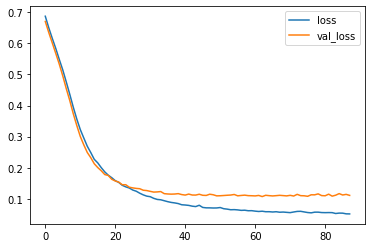

In [28]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Model 3: adding in DropOut Layers

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7299 - val_loss: 0.6529
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6823 - val_loss: 0.6362
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6575 - val_loss: 0.6164
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6579 - val_loss: 0.5995
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6067 - val_loss: 0.5681
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5752 - val_loss: 0.5343
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5697 - val_loss: 0.5070
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5585 - val_loss: 0.4764
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5100 - val_loss: 0.4520
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5199 - val_loss: 0.4250
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.1177 - val_loss: 0.1051
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1301 - val_loss: 0.0979
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1246 - val_loss: 0.1115
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1496 - val_loss: 0.1118
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0863 - val_loss: 0.1005
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1024 - val_loss: 0.1045
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0989 - val_loss: 0.1008
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1074 - val_loss: 0.0984
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1129 - val_loss: 0.0984
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1055 - val_loss: 0.1015
Epoch 93/600


<AxesSubplot:>

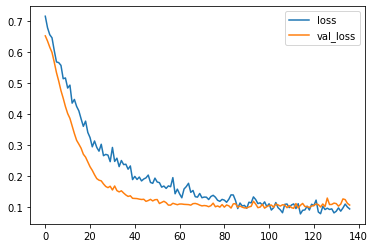

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
# This model was the best among the three tested

## Evaluating the model

In [33]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [36]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
